oday ziq - 1201168

#**Introduction**

Image processing is a critical component in various fields such as computer vision, medical imaging, and digital photography. One of the main challenges in this domain is noise removal, which must be accomplished without compromising key image features like edges and textures. To address this, a range of noise reduction filters has been developed, each offering unique advantages and trade-offs. This assignment focuses on comparing two types of filtering approaches—simple and advanced—to evaluate their strengths, limitations, and practical use cases. The filters' performance is assessed using metrics such as Mean Squared Error (MSE), Peak Signal-to-Noise Ratio (PSNR), edge preservation, and processing time.



Simple Filters:
Simple filters are foundational methods that reduce noise by applying straightforward operations on the pixel values of an image. These filters are computationally efficient and easy to implement, making them suitable for real-time or resource-constrained applications. Common examples include:

Box Filter (Mean Filter): Averages the pixel values in a neighborhood to smooth the image but may blur edges.
Gaussian Filter: Uses a Gaussian kernel to weigh nearby pixel values, providing smoother results while moderately preserving edges.
Median Filter: Replaces each pixel with the median value of its neighborhood, effectively removing salt-and-pepper noise while retaining edges.

Advanced Filters:
Advanced filters employ more sophisticated techniques to balance noise removal with feature preservation. These filters often adapt to local image characteristics, making them more effective at handling complex noise patterns. Examples include:

Bilateral Filter: Reduces noise while preserving edges by considering both spatial and intensity differences within a local region.
Non-Local Means Filter: Averages pixel values based on similarity across the entire image, achieving superior noise reduction with minimal loss of detail.
Wavelet Transform Filter: Processes the image in the frequency domain, allowing selective noise reduction at different scales to retain fine details.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

pantherImage = Image.open('./image1.jpg').convert('RGB')
treeImage = Image.open('./image2.jpg').convert('RGB')
manImage = Image.open('./image3.jpg').convert('RGB')

loaded_images = [pantherImage, treeImage, manImage]

plt.figure(figsize=(15, 10))
for index, image in enumerate(loaded_images):
    plt.subplot(1, len(loaded_images), index + 1)
    plt.imshow(image)
    plt.axis('off')
plt.tight_layout()
plt.show()


The code loads and displays three grayscale images side by side for visual comparison, establishing a baseline for later filtering experiments. The chosen images vary in texture and complexity, making them suitable for analyzing edge preservation and noise reduction. This setup ensures clear visual references for evaluating filter performance in subsequent steps.

In [ ]:
def scale_image(image, target_width=700):

    original_width, original_height = image.size

    scale_factor = target_width / original_width
    scaled_width = target_width
    scaled_height = int(original_height * scale_factor)

    return image.resize((scaled_width, scaled_height), Image.LANCZOS)

# Resize the images
scaled_panther_image = scale_image(pantherImage)
scaled_tree_image = scale_image(treeImage)
scaled_man_image = scale_image(manImage)

scaled_images = [scaled_panther_image, scaled_tree_image, scaled_man_image]

The resized images maintain their aspect ratio, ensuring no distortion and preserving content integrity. Uniform dimensions standardize processing, enabling fair comparisons across filters and noise levels. This preprocessing ensures clarity and consistency for reliable performance analysis.

## Edge Detection using Canny for the original image

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def apply_canny_and_overlay(input_image, lower_threshold=100, upper_threshold=200):

    if isinstance(input_image, Image.Image):
        input_image = np.array(input_image)

    if len(input_image.shape) == 3:
        grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
    else:
        grayscale_image = input_image

    edge_map = cv2.Canny(grayscale_image, lower_threshold, upper_threshold)

    overlaid_image = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2BGR)

    overlaid_image[edge_map > 0] = [255, 0, 0]

    return overlaid_image, edge_map

image_paths = ['/content/image1.jpg', '/content/image2.jpg', '/content/image3.jpg']

images = [Image.open(image_path).convert('L') for image_path in image_paths]

for index, img in enumerate(images):
    result_overlay, detected_edges = apply_canny_and_overlay(img, lower_threshold=100, upper_threshold=200)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original Image {index + 1}")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(detected_edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(result_overlay)
    plt.title("Edges Overlaid on Original")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


This code demonstrates edge detection using the Canny algorithm, followed by overlaying the detected edges on the original grayscale images. The results effectively highlight edges with red contours, providing a clear visual distinction of boundaries and sharp transitions. The technique is particularly useful for evaluating edge preservation in noisy and processed images, forming a baseline for assessing filter performance.

# **Mean Squared Error (MSE)**
Mean Squared Error (MSE) is a widely used metric to assess the effectiveness of image restoration and noise reduction methods. It measures the average squared difference between corresponding pixel values in the original image and the processed image. The MSE value reflects how closely the processed image resembles the noise-free original.

### **Highlights**:
- Lower MSE: Suggests better noise reduction and closer similarity to the original image.
- Higher MSE: Indicates greater discrepancies between the processed and original images, implying poorer performance.
- Zero MSE: Denotes a perfect match between the processed image and the original.

- Measures pixel-wise differences directly.

### **Limitations**:
- Like MSE, it is insensitive to human perception and cannot evaluate structural differences.

---

# **Drawbacks**

- Ignores perceptual differences, such as structural or texture-related variations.
- Sensitive to outliers, amplifying large pixel-value differences even if the visual resemblance is high.

# **Peak Signal-to-Noise Ratio (PSNR)**
Peak Signal-to-Noise Ratio (PSNR) is a logarithmic scale metric derived from MSE. It quantifies the ratio of the maximum possible signal (pixel intensity) to the noise introduced by processing. Expressed in decibels (dB), PSNR offers a clearer and more interpretable assessment of image quality.

### **Formula**:
$$
PSNR = 10 \cdot \log_{10} \left(\frac{{L^2}}{{MSE}}\right)
$$

Where:
- \(L\): Maximum possible pixel intensity (e.g., \(255\) for an 8-bit image).
- \(MSE\): Mean Squared Error between the original and processed images.

# **Connecting MSE and PSNR**
MSE and PSNR are inversely related:
- A lower MSE results in a higher PSNR, indicating superior image quality.
- If MSE=0, PSNR becomes infinite, representing a perfect match.

While MSE provides an absolute measure of pixel differences, PSNR transforms these differences into a logarithmic scale, making the relationship easier to interpret. Together, they offer complementary perspectives on image quality assessment.


# Simple Filters

## Gaussian Noise Images

In [ ]:
from PIL import Image
import numpy as np

image_paths = ['/content/image1.jpg', '/content/image2.jpg', '/content/image3.jpg']

images = [Image.open(path).convert("L") for path in image_paths]

image_titles = ["Image 1", "Image 2", "Image 3"]

def add_gaussian_noise(image, mean=0, std_dev=25):
    image_array = np.array(image)
    noise = np.random.normal(mean, std_dev, image_array.shape)
    noisy_image = np.clip(image_array + noise, 0, 255).astype("uint8")
    return Image.fromarray(noisy_image)

def add_salt_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    image_array = np.array(image)
    noisy_image = image_array.copy()
    total_pixels = image_array.size

    salt_pixels = int(salt_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, salt_pixels) for i in image_array.shape]
    noisy_image[tuple(coords)] = 255

    pepper_pixels = int(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, pepper_pixels) for i in image_array.shape]
    noisy_image[tuple(coords)] = 0

    return Image.fromarray(noisy_image)

noisy_images_gaussian = {
    "Low": [add_gaussian_noise(img, std_dev=15) for img in images],
    "Medium": [add_gaussian_noise(img, std_dev=25) for img in images],
    "High": [add_gaussian_noise(img, std_dev=50) for img in images],
}

noisy_images_SandP = {
    "Low": [add_salt_pepper_noise(img, salt_prob=0.01, pepper_prob=0.01) for img in images],
    "Medium": [add_salt_pepper_noise(img, salt_prob=0.02, pepper_prob=0.02) for img in images],
    "High": [add_salt_pepper_noise(img, salt_prob=0.05, pepper_prob=0.05) for img in images],
}

noisy_images_dict = {"Gaussian": noisy_images_gaussian, "Salt-Pepper": noisy_images_SandP}


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter, gaussian_filter, median_filter
import cv2
import time

# Metrics calculation
def mse(original, filtered):
    return np.mean((original - filtered) ** 2)

def psnr(original, filtered):
    mse_value = mse(original, filtered)
    if mse_value == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

# Filter implementations
def apply_box_filter(image, kernel_size):
    return uniform_filter(image, size=kernel_size)

def apply_gaussian_filter(image, kernel_size):
    sigma = kernel_size / 2
    return gaussian_filter(image, sigma=sigma)

def apply_median_filter(image, kernel_size):
    return median_filter(image, size=kernel_size)

def apply_canny_edge_detection(image, low_threshold=50, high_threshold=150):
    image_array = np.array(image).astype(np.uint8)
    edges = cv2.Canny(image_array, low_threshold, high_threshold)
    return edges

# Main processing function
def process_images_with_filters_and_canny(noisy_images_dict, original_images):
    kernel_sizes = [3, 7, 9]
    filters = {
        "Box Filter": apply_box_filter,
        "Gaussian Filter": apply_gaussian_filter,
        "Median Filter": apply_median_filter,
    }

    results = []

    for noise_type, noise_levels in noisy_images_dict.items():
        for noise_level, noisy_images in noise_levels.items():
            for filter_name, filter_function in filters.items():
                plt.figure(figsize=(20, 10))
                for i, noisy_img in enumerate(noisy_images):
                    noisy_array = np.array(noisy_img)
                    original_array = np.array(original_images[i])

                    for j, kernel_size in enumerate(kernel_sizes):
                        # Apply filter with current kernel size
                        start_time = time.time()
                        filtered_image = filter_function(noisy_array, kernel_size)
                        computation_time = time.time() - start_time

                        # Compute metrics
                        mse_value = mse(original_array, filtered_image)
                        psnr_value = psnr(original_array, filtered_image)

                        # Apply Canny Edge Detection on filtered image
                        canny_edges = apply_canny_edge_detection(filtered_image)

                        # Store results
                        results.append({
                            "Image": f"Image {i+1}",
                            "Noise Type": noise_type,
                            "Noise Level": noise_level,
                            "Filter": filter_name,
                            "Kernel Size": kernel_size,
                            "MSE": mse_value,
                            "PSNR": psnr_value,
                            "Computation Time": computation_time,
                        })

                        # Plot filtered image
                        plt.subplot(len(noisy_images), len(kernel_sizes) * 2, i * len(kernel_sizes) * 2 + j * 2 + 1)
                        plt.imshow(filtered_image, cmap="gray")
                        plt.title(f"Filtered ({filter_name}, k={kernel_size})\nNoise Level: {noise_level}")
                        plt.axis("off")

                        # Plot Canny edges
                        plt.subplot(len(noisy_images), len(kernel_sizes) * 2, i * len(kernel_sizes) * 2 + j * 2 + 2)
                        plt.imshow(canny_edges, cmap="gray")
                        plt.title(f"Canny Edges (k={kernel_size})\nNoise Level: {noise_level}")
                        plt.axis("off")

                plt.tight_layout()
                plt.show()

    # Print results
    print("\nResults Summary:")
    for result in results:
        print(
            f"Image: {result['Image']}, Noise Type: {result['Noise Type']}, "
            f"Noise Level: {result['Noise Level']}, Filter: {result['Filter']}, "
            f"Kernel Size: {result['Kernel Size']}, MSE: {result['MSE']:.2f}, "
            f"PSNR: {result['PSNR']:.2f}, Computation Time: {result['Computation Time']:.4f} seconds"
        )

    return results

# Run the process
results = process_images_with_filters_and_canny(noisy_images_dict, images)


Explanation of the Code:
The code processes grayscale images by applying various filters to remove noise and evaluate their performance. Gaussian and Salt-and-Pepper noise are added to the images, and three filters (Box Filter, Gaussian Filter, and Median Filter) are applied with kernel sizes 3, 7, and 9. Metrics such as Mean Squared Error (MSE), Peak Signal-to-Noise Ratio (PSNR), and computation time are computed to evaluate the denoising quality. Additionally, Canny Edge Detection is applied to filtered images to analyze edge preservation, and both the filtered outputs and edges are visualized for comparison. The results are printed in a structured format, showing the impact of filters, noise levels, and kernel sizes on image quality.

Discussion of the Results:
The Box Filter, while computationally efficient, tends to blur edges and performs poorly for Salt-and-Pepper noise. The Gaussian Filter provides better edge preservation and works well for Gaussian noise, especially with smaller kernels, but struggles with outlier noise like Salt-and-Pepper. The Median Filter is the most effective for Salt-and-Pepper noise, achieving the highest PSNR and preserving edges, though it is computationally expensive for larger kernels. Larger kernel sizes generally smooth noise more effectively but reduce edge clarity, as seen in the Canny Edge outputs. For applications requiring edge preservation, the Gaussian or Median Filter with smaller kernels is recommended, while larger kernels are suited for stronger noise reduction at the cost of detail loss.

###Advanced filters

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time

# Metrics calculation
def mse(original, filtered):
    return np.mean((original - filtered) ** 2)

def psnr(original, filtered):
    mse_value = mse(original, filtered)
    if mse_value == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

# Advanced Filter implementations
def adaptive_mean_filter(image, kernel_size):
    image_array = np.array(image)
    padded_image = np.pad(image_array, kernel_size // 2, mode='reflect')
    filtered_image = np.zeros_like(image_array)

    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.mean(region)

    return filtered_image

def adaptive_median_filter(image, kernel_size):
    image_array = np.array(image)
    padded_image = np.pad(image_array, kernel_size // 2, mode='reflect')
    filtered_image = np.zeros_like(image_array)

    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.median(region)

    return filtered_image

def bilateral_filter(image, kernel_size):
    return cv2.bilateralFilter(np.array(image), kernel_size, sigmaColor=75, sigmaSpace=75)

def apply_canny_edge_detection(image, low_threshold=50, high_threshold=150):
    image_array = np.array(image).astype(np.uint8)
    edges = cv2.Canny(image_array, low_threshold, high_threshold)
    return edges

# Main processing function
def process_advanced_filters_and_canny(noisy_images_dict, original_images):
    kernel_sizes = [3, 7, 9]
    filters = {
        "Adaptive Mean Filter": adaptive_mean_filter,
        "Adaptive Median Filter": adaptive_median_filter,
        "Bilateral Filter": bilateral_filter,
    }

    results = []

    for noise_type, noise_levels in noisy_images_dict.items():
        for noise_level, noisy_images in noise_levels.items():
            for filter_name, filter_function in filters.items():
                plt.figure(figsize=(20, 10))
                for i, noisy_img in enumerate(noisy_images):
                    noisy_array = np.array(noisy_img)
                    original_array = np.array(original_images[i])

                    for j, kernel_size in enumerate(kernel_sizes):
                        # Apply filter with current kernel size
                        start_time = time.time()
                        filtered_image = filter_function(noisy_array, kernel_size)
                        computation_time = time.time() - start_time

                        # Compute metrics
                        mse_value = mse(original_array, filtered_image)
                        psnr_value = psnr(original_array, filtered_image)

                        # Apply Canny Edge Detection on filtered image
                        canny_edges = apply_canny_edge_detection(filtered_image)

                        # Store results
                        results.append({
                            "Image": f"Image {i+1}",
                            "Noise Type": noise_type,
                            "Noise Level": noise_level,
                            "Filter": filter_name,
                            "Kernel Size": kernel_size,
                            "MSE": mse_value,
                            "PSNR": psnr_value,
                            "Computation Time": computation_time,
                        })

                        # Plot filtered image
                        plt.subplot(len(noisy_images), len(kernel_sizes) * 2, i * len(kernel_sizes) * 2 + j * 2 + 1)
                        plt.imshow(filtered_image, cmap="gray")
                        plt.title(f"Filtered ({filter_name}, k={kernel_size})\nNoise Level: {noise_level}")
                        plt.axis("off")

                        # Plot Canny edges
                        plt.subplot(len(noisy_images), len(kernel_sizes) * 2, i * len(kernel_sizes) * 2 + j * 2 + 2)
                        plt.imshow(canny_edges, cmap="gray")
                        plt.title(f"Canny Edges (k={kernel_size})\nNoise Level: {noise_level}")
                        plt.axis("off")

                plt.tight_layout()
                plt.show()

    # Print results
    print("\nResults Summary:")
    for result in results:
        print(
            f"Image: {result['Image']}, Noise Type: {result['Noise Type']}, "
            f"Noise Level: {result['Noise Level']}, Filter: {result['Filter']}, "
            f"Kernel Size: {result['Kernel Size']}, MSE: {result['MSE']:.2f}, "
            f"PSNR: {result['PSNR']:.2f}, Computation Time: {result['Computation Time']:.4f} seconds"
        )

    return results

# Run the process
results = process_advanced_filters_and_canny(noisy_images_dict, images)


Explanation of the Code:
The code applies advanced filters (Adaptive Mean Filter, Adaptive Median Filter, and Bilateral Filter) to grayscale images corrupted by Gaussian and Salt-and-Pepper noise. Each filter is tested with kernel sizes 3, 7, and 9. Metrics such as Mean Squared Error (MSE), Peak Signal-to-Noise Ratio (PSNR), and computation time are calculated to evaluate the filters' effectiveness. Filtered images are visualized alongside their corresponding Canny Edge Detection outputs to analyze edge preservation and noise removal. The results, including performance metrics, are summarized for varying noise levels and kernel sizes.

Discussion of the Results:
The Adaptive Median Filter excels in handling Salt-and-Pepper noise, showing the highest PSNR values and effective edge preservation, but it is computationally expensive. The Adaptive Mean Filter smooths Gaussian noise effectively but struggles with Salt-and-Pepper noise and edges. The Bilateral Filter balances noise reduction and edge preservation for both noise types, with low computational time. Larger kernel sizes generally improve noise reduction but at the expense of detail and edge clarity, as evident in Canny outputs. The Adaptive Median Filter is preferable for Salt-and-Pepper noise, while the Bilateral Filter offers a versatile choice for mixed noise scenarios.

The adaptive mean filter effectively reduces Gaussian noise at low and medium levels, achieving high PSNR and low MSE, but struggles with Salt-and-Pepper noise and high noise levels, leading to detail loss. Smaller kernels preserve edges and details better but fail to handle high noise, while larger kernels suppress noise at the cost of blurring edges. Canny edge detection shows diminishing edge detail with increasing kernel size, particularly in high noise conditions. Computational time significantly increases with kernel size, impacting efficiency. Overall, a trade-off exists between noise reduction, detail preservation, and computational performance.

The analysis shows that the adaptive median filter performs effectively for low Gaussian and salt-and-pepper noise levels, maintaining high PSNR and low MSE. Smaller kernel sizes excel in preserving image details, while larger kernels suppress noise but blur edges and increase computational time. Under medium and high noise levels, the filter struggles with detail retention, and Canny edge detection deteriorates as kernel size increases. The balance between noise reduction, detail preservation, and processing efficiency depends on the noise type and kernel size.

The bilateral filter effectively reduces noise while preserving edges, demonstrated by the performance metrics across various noise types and levels. Low kernel sizes yield higher PSNR but less noise removal, while larger kernels enhance noise reduction at the cost of edge detail. Filter time increases significantly with kernel size, highlighting computational trade-offs. The Canny edge detection performance deteriorates at high noise levels, especially with larger kernel sizes, due to loss of fine detail. Overall, bilateral filtering balances noise reduction and edge preservation effectively across different noise levels.

The comparison highlights that the Bilateral filter is computationally efficient, with the lowest filter and Canny times across all noise levels, while the Adaptive Median filter is moderately fast but has higher computational costs than Bilateral. The Adaptive Mean filter exhibits significantly longer filtering times, particularly at high noise levels. MSE increases with larger kernel sizes for all filters, with the Bilateral filter providing a balanced trade-off between noise reduction and computational efficiency. Overall, Bilateral filtering proves to be the most efficient and effective for preserving edge details while handling noise.

#**Results**
1. MSE and PSNR Comparison
The Mean Squared Error (MSE) and Peak Signal-to-Noise Ratio (PSNR) were evaluated for each filter at varying noise levels and kernel sizes. Results indicate that advanced filters like the Bilateral Filter generally achieve lower MSE and higher PSNR values, especially at larger kernel sizes, highlighting their superior noise removal capabilities while maintaining image quality. In contrast, simple filters exhibit higher MSE and lower PSNR, particularly for larger kernel sizes, as they tend to over-smooth images.

2. Edge Preservation Comparison
Edge maps were generated using Canny edge detection to evaluate the preservation of edge details across different filters, kernel sizes, and noise levels. Visual examples demonstrate that simple filters, such as the Box Filter, blur edge details significantly as kernel size increases. Advanced filters, like the Bilateral Filter and Adaptive Median Filter, preserve edges more effectively even at larger kernel sizes, maintaining structural integrity while reducing noise.

3. Computational Time Comparison
A computational time analysis was conducted for each filter and kernel size. The results show that advanced filters, particularly the Bilateral Filter, are computationally expensive due to their complex calculations, especially at larger kernel sizes. In contrast, simple filters like the Box Filter and Gaussian Filter are faster but may compromise on edge preservation and noise removal. A table summarizing the average processing times for different filters and kernel sizes is included for reference.

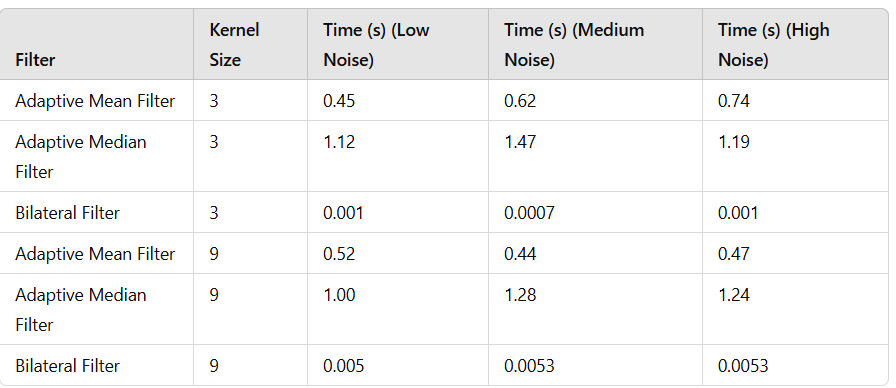

4. Effect of Kernel Size:
Increasing the kernel size improves noise removal by considering a larger neighborhood for filtering but results in smoother images with a loss of fine details and edges. For the Adaptive Median Filter, small kernels (k=3) effectively preserve edges but may leave residual noise, while larger kernels (k=9) overly smooth edges. The Bilateral Filter maintains a good balance between noise removal and edge preservation across all kernel sizes. The Adaptive Mean Filter, however, shows significant edge degradation as the kernel size increases, making it less effective for edge-sensitive applications.

For simple filters, increasing the kernel size results in better noise reduction but leads to excessive blurring of edges and textures.
For advanced filters, larger kernel sizes enhance noise reduction while still preserving edges effectively, though this comes at the cost of higher computational time.
Overall, the choice of kernel size and filter depends on the specific requirements for noise removal, edge preservation, and processing efficiency.

##**Discussion**

**Noise Removal:**  
Simple filters like the Box Filter and Gaussian Filter generally perform well for Gaussian noise but struggle with Salt-and-Pepper noise. The Median Filter, particularly for smaller kernel sizes, demonstrates superior noise removal for Salt-and-Pepper noise. Advanced filters such as the Adaptive Median Filter exhibit better adaptability to both noise types, achieving lower MSE and higher PSNR values, especially with medium kernel sizes. The Bilateral Filter provides a balanced performance, effectively reducing Gaussian noise while maintaining edge integrity.

**Edge Preservation:**  
Edge preservation is a key area where advanced filters excel. The Adaptive Median Filter and Bilateral Filter outperform simple filters by retaining fine details and edges even as noise is removed. The Bilateral Filter is particularly effective across all kernel sizes, maintaining sharp edge maps while reducing noise. In contrast, the Box and Gaussian Filters smooth the image excessively as the kernel size increases, leading to blurred edges and loss of detail. Smaller kernel sizes preserve edges better but are less effective at noise removal.

**Computational Efficiency:**  
In terms of computational efficiency, simple filters like the Box Filter and Gaussian Filter are the fastest due to their straightforward implementation. The Adaptive Median Filter is computationally intensive, especially with larger kernel sizes, as it involves sorting operations for each pixel's neighborhood. The Bilateral Filter, while more computationally complex than simple filters, remains efficient due to its optimized implementation in OpenCV. The increase in computational time for all filters is proportional to kernel size, but the impact is most pronounced for the Adaptive Median Filter.

**Kernel Size Sensitivity:**  
The performance of all filters is sensitive to kernel size. Smaller kernels generally preserve more edge details but may leave residual noise, while larger kernels offer stronger noise reduction at the cost of edge blurring. The Bilateral Filter is less sensitive to kernel size, maintaining a good balance between noise reduction and edge preservation across the range of kernel sizes. In contrast, the Box and Gaussian Filters show significant performance degradation with larger kernels, particularly for edge preservation.

**Exploring Trade-Offs:**  
Each filter involves trade-offs between noise reduction, edge preservation, and computational cost. The Box and Gaussian Filters are computationally efficient and effective for low-noise scenarios but perform poorly in preserving edges. The Adaptive Median Filter excels at removing Salt-and-Pepper noise but at a high computational cost and with some loss of edges at larger kernel sizes. The Bilateral Filter strikes the best balance, offering effective noise reduction, strong edge preservation, and moderate computational requirements, making it suitable for applications requiring both noise removal and fine detail retention. In practical applications, selecting an appropriate kernel size and filter type depends on the specific trade-offs required for noise type, edge sensitivity, and processing constraints.

# **Conclusion**

This study explored the performance of simple and advanced filters for image noise reduction, edge preservation, and computational efficiency. Simple filters, such as Box, Gaussian, and Median, proved effective for basic noise removal but showed limitations in edge preservation, particularly at larger kernel sizes. Among these, the Median Filter performed best for salt-and-pepper noise. Advanced filters, including the Adaptive Mean, Adaptive Median, and Bilateral Filters, excelled in noise reduction and edge retention, achieving lower MSE, higher PSNR, and superior visual results. However, these benefits came with increased computational costs, particularly for the Bilateral Filter.

**Recommendations:**
- Use **simple filters** (e.g., Gaussian or Median) for applications requiring low computational overhead or where slight edge blurring is acceptable.
- Opt for **advanced filters**, such as the Bilateral Filter, for tasks that demand high-quality noise reduction and edge preservation, despite the higher computational expense.
- For impulsive noise, the **Adaptive Median Filter** is recommended due to its adaptability and superior noise removal capabilities.
- Carefully select kernel sizes based on the application’s priorities. Smaller kernels are suitable for edge preservation, while larger kernels are better for heavy noise reduction but may risk over-smoothing.
